# Newcomb-Benford Law

Benford’s law states that, in many real-life numerical dataset, the leading digit follows a distributions that skew towards smaller values.

Specifically, the leading digit $d \in \{1, \dots,9\}$ occurs with probability

$$ P(d) = \log_{10}\left(1+\frac{1}{d}\right) $$

This notebook explains this theorem by running random experiments on a log-uniformly distributed dataset.

In [2]:
import numpy as np
from matplotlib import pyplot as plt

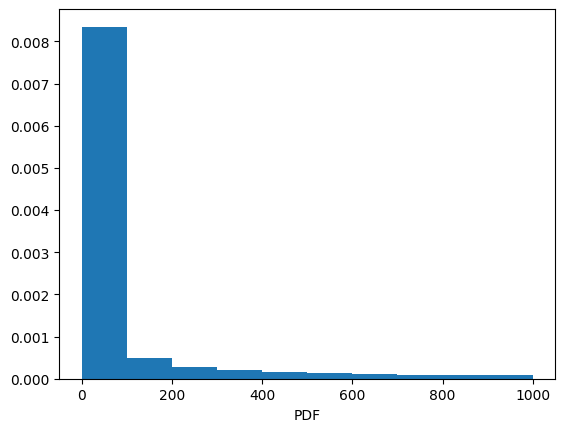

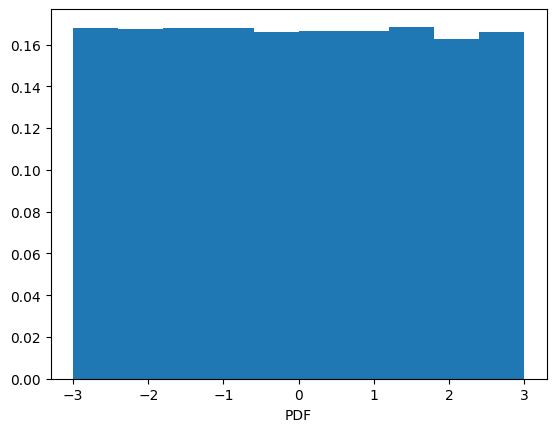

In [5]:
def sample_unif(a, b, size):
    return np.random.uniform(a, b, size)

def sample_log_unif(a, b, size):
    y = sample_unif(np.log(a), np.log(b), size)
    return np.exp(y)


# Test the log uniform sampler
X = sample_log_unif(1e-3, 1e3, 100000)
Y = np.log10(X)

plt.figure()
plt.hist(X, bins=10, density=True)
plt.xlabel("X")
plt.xlabel("PDF")
plt.show()

plt.figure()
plt.hist(Y, bins=10, density=True)
plt.xlabel("Log10(X)")
plt.xlabel("PDF")
plt.show()
plt.close('all')

Leading digit count: [0.3025  0.17529 0.12696 0.09586 0.07794 0.06684 0.05835 0.05115 0.04511]


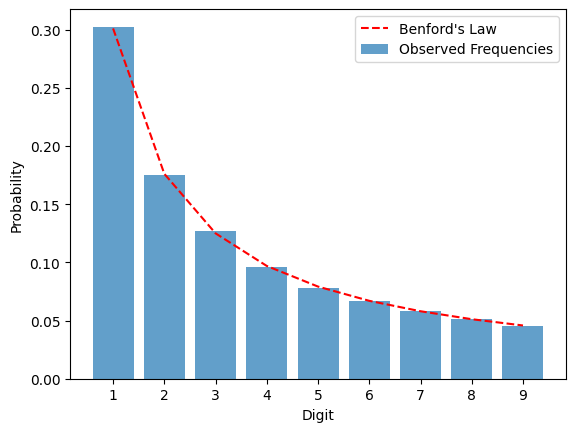

In [75]:
# Implement the leading digit counting procedure
def leading_digits(X, base=10):
    # Decompose into x = a * 10**b
    b = np.floor(np.log(X) / np.log(base))
    a = X / base**b
    return np.floor(a).astype(int)


def count_leading_digits(X, base=10, probability=False):
    Y = leading_digits(X, base)
    count = np.bincount(Y, minlength=base-1)
    assert count[0] == 0
    count = count[1:]
    if probability:
        return count / len(X)
    else:
        return count
    
    
# Test Benford's Law on a log-uniformly distributed data [eps, b]
base = 10
X = sample_log_unif(1, base**3, 100000)
count = count_leading_digits(X, base, probability=True)
print("Leading digit count:", count)

plt.figure()
# Plot the observed frequencies
plt.bar(range(1, base), count, width=0.8, align='center', alpha=0.7, label='Observed Frequencies')
# Plot the theoretical probabilities
benford_probs = np.log(1 + 1 / np.arange(1, base)) / np.log(base)
plt.plot(range(1, base), benford_probs, 'r--', label='Benford\'s Law')
plt.legend()
plt.xticks(range(1, base))
plt.xlabel("Digit")
plt.ylabel("Probability")
plt.show()
plt.close('all')

Further, we want to explore if the first digits of a dataset generated from a *log-normal distribution* follows or partially follows the Benford's law

Mean 1.6608314428738162


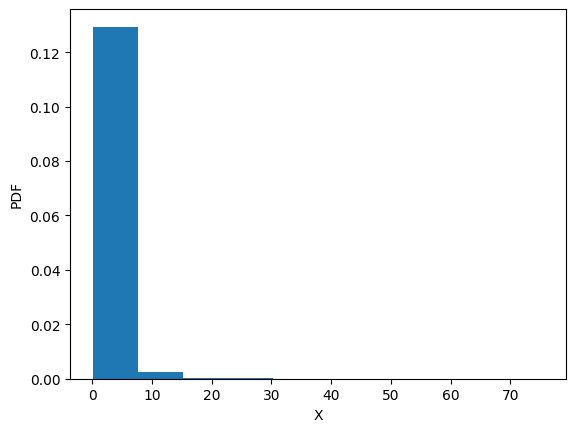

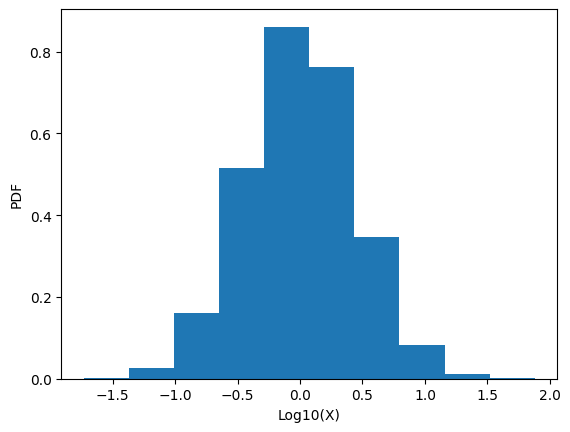

In [56]:
def sample_normal(mean, std, size):
    return np.random.normal(mean, std, size)

def sample_log_normal(mu, sigma, size):
    y = sample_normal(mu, sigma, size)
    return np.exp(y)


# Test the log normal sampler
X = sample_log_normal(0, 1, 100000)
print("Mean", np.mean(X))
Y = np.log10(X)
plt.figure()
plt.hist(X, bins=10, density=True)
plt.xlabel("X")
plt.ylabel("PDF")
plt.show()

plt.figure()
plt.hist(Y, bins=10, density=True)
plt.xlabel("Log10(X)")
plt.ylabel("PDF")
plt.show()
plt.close('all')

Leading digit count: [0.34115 0.19036 0.13375 0.10593 0.08915 0.07505 0.06461]


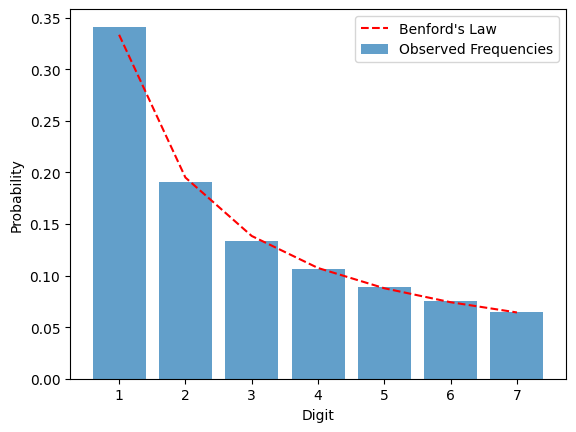

Leading digit count: [0.27532 0.13488 0.08958 0.0679  0.05784 0.05067 0.04859 0.04336 0.04
 0.03758 0.03636 0.03227 0.03094 0.02812 0.02659]


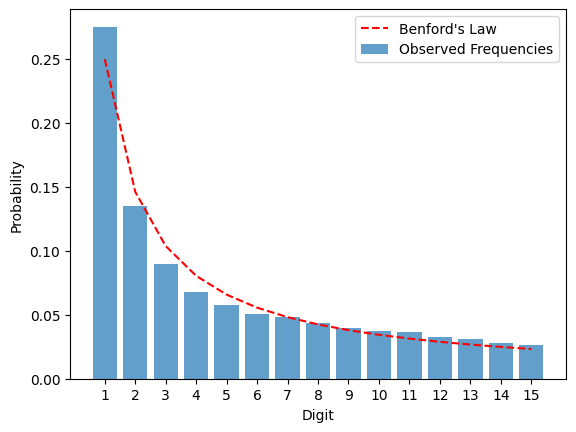

Leading digit count: [0.25911 0.11304 0.06213 0.04152 0.03285 0.02823 0.02507 0.02364 0.02361
 0.02334 0.02225 0.02278 0.0215  0.02098 0.02074 0.02014 0.01987 0.01915
 0.01837 0.01764 0.01713 0.01591 0.01638 0.0162  0.01507 0.01514 0.01448
 0.0138  0.01389 0.01333 0.01271]


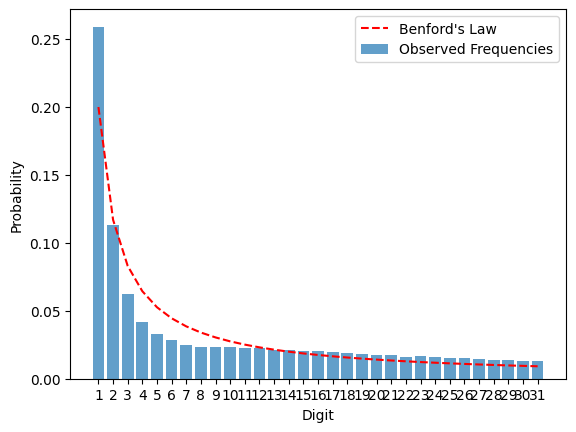

In [73]:
# Test Benford's Law on a log-normally distributed data
for base in [8, 16, 32]:
    X = sample_log_normal(0, 1, 100000)
    count = count_leading_digits(X, base, probability=True)
    print("Leading digit count:", count)

    plt.figure()
    # Plot the observed frequencies
    plt.bar(range(1, base), count, width=0.8, align='center', alpha=0.7, label='Observed Frequencies')
    # Plot the theoretical probabilities
    benford_probs = np.log(1 + 1 / np.arange(1, base)) / np.log(base)
    plt.plot(range(1, base), benford_probs, 'r--', label='Benford\'s Law')
    plt.legend()
    plt.xticks(range(1, base))
    plt.xlabel("Digit")
    plt.ylabel("Probability")
    plt.show()
plt.close('all')

Cool. So it seems the Benford's law approximately holds for log-normal distributions as well. What about distributions where Benford's law does not hold?

Let's try the uniform distribution and normal distribution.

Leading digit count: [0.1109  0.11042 0.11163 0.11126 0.1112  0.11218 0.11117 0.11105 0.11019]


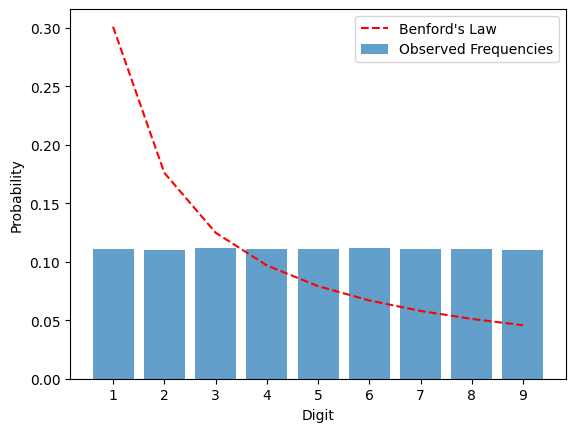

In [78]:
# Test Benford's Law on a uniformly distributed data
for base in [10]:
    X = sample_unif(0, 1, 100000)
    count = count_leading_digits(X, base, probability=True)
    print("Leading digit count:", count)

    plt.figure()
    # Plot the observed frequencies
    plt.bar(range(1, base), count, width=0.8, align='center', alpha=0.7, label='Observed Frequencies')
    # Plot the theoretical probabilities
    benford_probs = np.log(1 + 1 / np.arange(1, base)) / np.log(base)
    plt.plot(range(1, base), benford_probs, 'r--', label='Benford\'s Law')
    plt.legend()
    plt.xticks(range(1, base))
    plt.xlabel("Digit")
    plt.ylabel("Probability")
    plt.show()
plt.close('all')

Leading digit count: [4.9932e-01 0.0000e+00 0.0000e+00 0.0000e+00 1.0000e-05 1.2700e-03
 2.1410e-02 1.3780e-01 3.4019e-01]


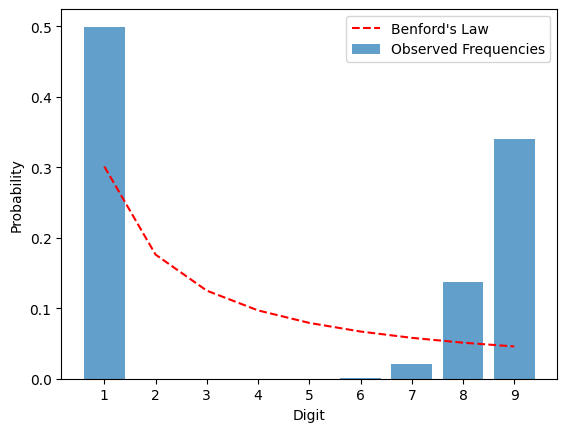

In [89]:
# Test Benford's Law on a normally distributed data
for base in [10]:
    X = sample_normal(10, 1, 100000)
    X[X <= 0] = 0
    count = count_leading_digits(X, base, probability=True)
    print("Leading digit count:", count)

    plt.figure()
    # Plot the observed frequencies
    plt.bar(range(1, base), count, width=0.8, align='center', alpha=0.7, label='Observed Frequencies')
    # Plot the theoretical probabilities
    benford_probs = np.log(1 + 1 / np.arange(1, base)) / np.log(base)
    plt.plot(range(1, base), benford_probs, 'r--', label='Benford\'s Law')
    plt.legend()
    plt.xticks(range(1, base))
    plt.xlabel("Digit")
    plt.ylabel("Probability")
    plt.show()
plt.close('all')